In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from skimage import io
from tensorflow.examples.tutorials.mnist import input_data
import math
from dataset import Dataset
%matplotlib inline

In [5]:
def zoomUnit(act,indexFilter):
    return act[0,:,:,indexFilter]

def showAllFilters(act):
    print "Plotting layer with shape ",act.shape
    nFilters = act.shape[3]


    filter = 0
    rows = int(np.ceil(nFilters*1.0/5))
    print rows
    for i in range(rows):
        fig, grid = plt.subplots(1, 5)
        for j in range(5):
            if filter >= nFilters:
                break
            grid[j].imshow(act[0,:,:,filter],interpolation='none')
            filter+=1

In [2]:
#Load image
from dataset import grayscaleEq
dataset = Dataset("data/BaselineOuterInner", batch_size=20)
#pathImageTest = "data/Scalograms/1d0_0.jpg"

#Load image and prepare for input
#imageToUse= grayscaleEq(io.imread(pathImageTest))
#imageToUse = dataset.normalizeImage(imageToUse)
#plt.imshow(imageToUse, interpolation="nearest")
#imageToUse = imageToUse.reshape((1, 96, 96, 1))

Plotting layer with shape  (1, 96, 96, 64)
13
Output layer  [[  2.41172981  15.64016247]]


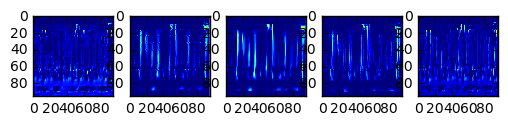

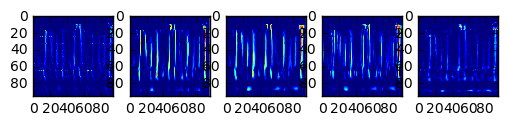

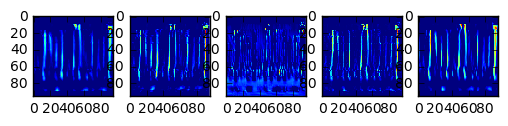

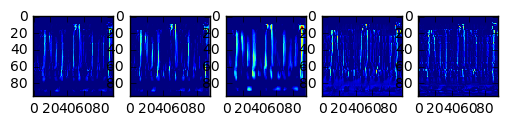

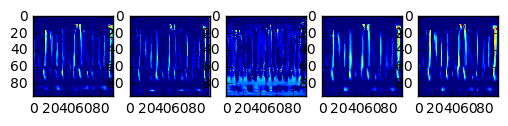

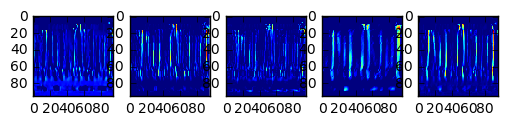

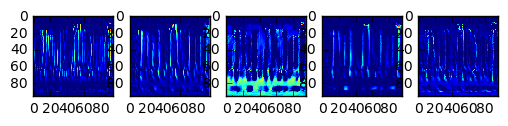

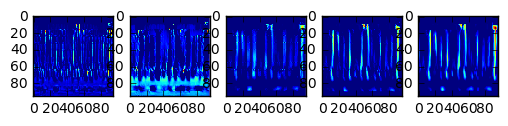

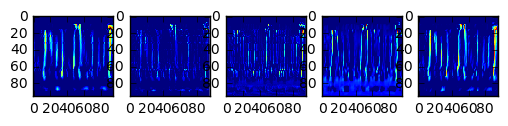

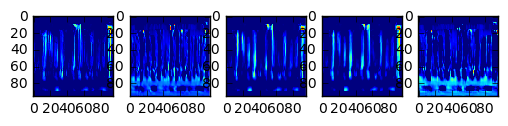

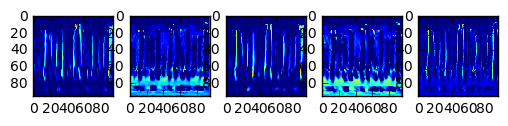

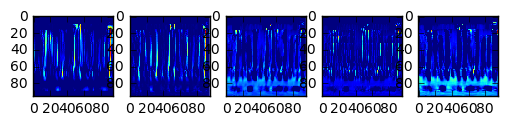

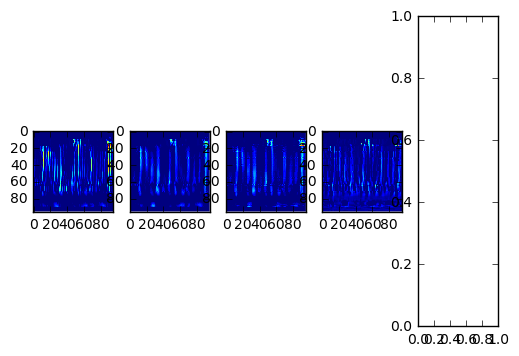

In [19]:
# with tf.Session() as sess:
#     new_saver = tf.train.import_meta_graph('savedModels/my-model.meta')
#     new_saver.restore(sess, 'savedModels/my-model')
#     md = sess.graph.get_tensor_by_name('model_input:0')
#     kp = sess.graph.get_tensor_by_name('dropout_prob:0')
# 
#     #Layer visualization
#     tosee = 'conv1/Relu:0'
#     unit = sess.graph.get_tensor_by_name(tosee)
# 
#     v_ = sess.run((unit), feed_dict={md: imageToUse,kp:1.0})
#     showAllFilters(v_)
# 
#     #Output layer
#     ot = sess.run((sess.graph.get_tensor_by_name('fc2/Relu:0')), feed_dict={md: imageToUse,kp:1.0})
#     print "Output layer ",ot

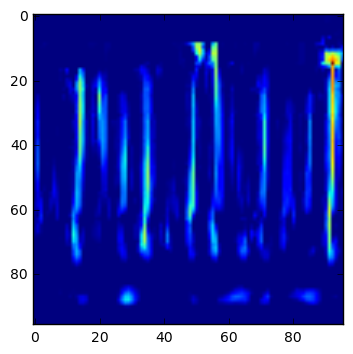

In [20]:
# plt.figure()
# plt.imshow(zoomUnit(v_,2))

rmediateSpeed/89.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/240.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/574.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/811.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/891.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/168.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/380.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/167.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/436.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/782.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/378.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/169.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/893.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/356.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/464.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/613.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/843.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/12.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/353.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/178.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/783.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/913.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/813.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/107.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/804.jpg score [[ 0.  1.]] is Baseline
ermediateSpeed/7.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/166.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/937.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/138.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/688.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/194.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/472.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/57.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/405.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/303.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/717.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/567.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/20.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/900.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/179.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/384.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/210.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/370.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/894.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/101.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/697.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/788.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/293.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/16.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/540.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/108.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/64.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/850.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/938.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/723.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/306.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/499.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/103.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/470.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/187.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/611.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/601.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/159.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/32.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/909.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/482.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/658.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/297.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/216.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/474.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/406.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/311.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/907.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/759.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/42.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/28.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/725.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/402.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/675.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/31.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/565.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/627.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/403.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/442.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/348.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/309.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/825.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/389.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/282.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/655.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/885.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/44.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/113.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/707.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/733.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/238.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/533.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/407.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/789.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/591.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/935.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/399.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/506.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/471.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/242.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/511.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/931.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/435.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/76.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/841.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/78.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/61.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/923.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/212.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/36.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/161.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/919.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/156.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/59.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/30.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/880.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/29.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/765.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/572.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/501.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/343.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/171.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/890.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/223.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/388.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/146.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/62.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/590.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/582.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/770.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/40.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/926.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/65.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/679.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/888.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/846.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/514.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/879.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/492.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/660.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/594.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/27.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/172.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/253.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/737.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/758.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/901.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/377.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/571.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/258.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/760.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/863.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/622.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/608.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/628.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/287.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/650.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/583.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/917.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/578.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/598.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/559.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/142.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/837.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/110.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/580.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/322.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/199.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/940.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/814.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/664.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/856.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/58.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/487.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/716.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/872.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/922.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/498.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/618.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/761.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/542.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/347.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/437.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/383.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/439.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/206.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/832.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/530.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/678.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/829.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/797.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/924.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/648.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/73.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/357.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/666.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/507.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/34.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/67.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/392.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/822.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/334.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/790.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/512.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/299.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/213.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/318.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/816.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/596.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/807.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/141.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/79.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/315.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/469.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/355.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/599.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/109.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/450.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/778.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/746.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/752.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/419.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/808.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/427.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/271.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/184.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/683.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/350.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/185.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/624.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/851.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/220.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/818.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/796.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/780.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/269.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/526.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/691.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/77.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/794.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/133.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/222.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/126.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/686.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/193.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/281.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/750.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/918.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/809.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/489.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/90.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/739.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/443.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/247.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/573.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/702.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/589.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/320.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/915.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/643.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/479.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/372.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/188.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/735.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/781.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/950.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/785.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/576.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/777.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/301.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/154.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/221.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/217.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/267.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/433.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/698.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/834.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/286.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/362.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/534.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/485.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/143.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/162.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/196.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/943.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/496.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/609.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/224.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/88.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/554.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/602.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/945.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/115.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/423.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/852.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/441.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/673.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/871.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/137.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/516.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/741.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/412.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/229.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/230.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/45.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/117.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/551.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/525.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/85.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/294.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/801.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/889.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/358.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/713.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/413.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/288.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/295.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/48.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/394.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/776.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/906.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/376.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/135.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/495.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/824.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/805.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/847.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/639.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/684.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/779.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/619.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/895.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/911.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/870.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/264.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/385.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/755.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/198.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/732.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/112.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/391.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/454.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/615.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/823.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/250.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/41.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/874.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/629.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/37.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/792.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/585.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/262.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/80.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/614.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/123.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/13.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/882.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/762.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/672.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/483.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/848.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/633.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/69.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/204.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/705.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/488.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/300.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/584.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/345.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/461.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/539.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/150.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/416.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/543.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/916.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/652.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/426.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/189.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/690.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/689.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/773.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/810.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/319.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/277.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/192.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/772.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/424.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/116.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/227.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/728.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/60.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/280.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/102.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/214.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/386.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/642.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/603.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/276.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/941.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/339.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/226.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/899.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/333.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/626.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/324.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/254.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/682.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/661.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/694.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/175.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/151.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/87.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/630.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/323.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/887.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/612.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/484.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/791.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/163.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/636.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/558.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/747.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/260.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/536.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/363.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/839.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/285.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/692.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/157.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/434.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/740.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/458.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/266.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/714.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/239.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/518.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/577.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/272.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/665.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/869.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/914.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/18.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/181.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/749.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/505.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/149.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/681.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/125.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/855.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/467.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/312.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/522.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/241.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/784.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/718.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/310.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/447.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/420.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/97.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/369.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/449.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/538.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/568.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/351.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/674.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/704.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/920.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/586.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/646.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/201.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/699.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/641.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/396.jpg score [[ 0.  1.]] is Baseline
ermediateSpeed/9.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/335.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/190.jpg score [[ 0.  1.]] is Baseline
ermediateSpeed/3.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/566.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/86.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/647.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/550.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/756.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/308.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/203.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/745.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/721.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/793.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/753.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/504.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/50.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/815.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/947.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/234.jpg score [[ 0.  1.]] is Baseline
ermediateSpeed/5.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/494.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/933.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/93.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/279.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/327.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/307.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/849.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/521.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/411.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/202.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/440.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/408.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/134.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/493.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/508.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/904.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/246.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/404.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/257.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/275.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/549.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/711.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/122.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/140.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/524.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/927.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/387.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/256.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/517.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/51.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/14.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/243.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/398.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/587.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/349.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/709.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/211.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/738.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/727.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/677.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/502.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/268.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/148.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/455.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/604.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/478.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/685.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/767.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/548.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/588.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/305.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/868.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/144.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/490.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/68.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/237.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/99.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/481.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/414.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/476.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/563.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/710.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/430.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/523.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/71.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/136.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/905.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/452.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/726.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/831.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/763.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/259.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/766.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/719.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/284.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/302.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/668.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/798.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/515.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/902.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/354.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/579.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/446.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/775.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/114.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/173.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/100.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/786.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/942.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/883.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/316.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/131.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/560.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/881.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/908.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/152.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/581.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/180.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/687.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/274.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/722.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/321.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/23.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/53.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/537.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/736.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/52.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/670.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/921.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/491.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/54.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/864.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/337.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/373.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/553.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/527.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/623.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/712.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/625.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/575.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/555.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/10.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/700.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/634.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/830.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/751.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/153.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/606.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/401.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/862.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/592.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/875.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/462.jpg score [[ 0.  1.]] is Baseline
ermediateSpeed/4.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/346.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/75.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/600.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/884.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/270.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/248.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/892.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/800.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/304.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/597.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/374.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/330.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/948.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/292.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/703.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/366.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/393.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/878.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/453.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/365.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/744.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/364.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/468.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/158.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/445.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/66.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/56.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/544.jpg score [[ 0.  1.]] is Baseline
ermediateSpeed/6.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/417.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/799.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/545.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/127.jpg score [[ 0.  1.]] is Baseline
ermediateSpeed/2.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/657.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/72.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/731.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/96.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/654.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/912.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/359.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/421.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/244.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/774.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/653.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/833.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/438.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/876.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/121.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/176.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/509.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/431.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/183.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/457.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/25.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/263.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/283.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/208.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/128.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/477.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/680.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/910.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/11.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/701.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/22.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/332.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/325.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/617.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/865.jpg score [[ 0.  1.]] is Baseline
ermediateSpeed/1.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/859.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/33.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/513.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/360.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/645.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/91.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/328.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/844.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/853.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/729.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/177.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/475.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/465.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/663.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/164.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/233.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/621.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/139.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/463.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/897.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/460.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/209.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/858.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/928.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/111.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/231.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/949.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/497.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/510.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/371.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/92.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/812.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/860.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/298.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/344.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/459.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/936.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/379.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/546.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/249.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/693.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/225.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/390.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/632.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/55.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/557.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/473.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/296.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/708.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/451.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/500.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/21.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/245.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/932.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/218.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/228.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/352.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/265.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/827.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/730.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/556.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/63.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/104.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/564.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/946.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/381.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/207.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/635.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/170.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/215.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/532.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/787.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/418.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/409.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/857.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/26.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/644.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/771.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/428.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/720.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/569.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/903.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/929.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/74.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/291.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/338.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/397.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/400.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/160.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/415.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/118.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/861.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/480.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/867.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/535.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/631.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/651.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/361.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/197.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/835.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/662.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/695.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/754.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/342.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/255.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/595.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/638.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/930.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/840.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/132.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/637.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/19.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/84.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/715.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/273.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/529.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/764.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/696.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/520.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/205.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/734.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/83.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/329.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/757.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/341.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/106.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/486.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/340.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/314.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/519.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/743.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/802.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/46.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/769.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/541.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/898.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/336.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/819.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/290.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/842.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/561.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/17.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/669.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/95.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/836.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/43.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/70.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/466.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/593.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/232.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/706.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/395.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/896.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/278.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/667.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/616.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/195.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/38.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/620.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/821.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/94.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/562.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/429.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/49.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/724.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/35.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/531.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/219.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/676.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/24.jpg score [[ 0.  1.]] is Baseline
ermediateSpeed/8.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/155.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/444.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/448.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/252.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/795.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/607.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/640.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/289.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/817.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/659.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/925.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/425.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/547.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/866.jpg score [[ 0.  1.]] is Baseline
rmediateSpeed/82.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/768.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/873.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/15.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/845.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/432.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/129.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/649.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/422.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/854.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/552.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/456.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/944.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/261.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/826.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/313.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/939.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/200.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/382.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/317.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/368.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/236.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/410.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/528.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/130.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/331.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/570.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/820.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/120.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/838.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/828.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/748.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/119.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/656.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/803.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/147.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/326.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/806.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/610.jpg score [[ 0.  1.]] is Baseline


rmediateSpeed/98.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/235.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/251.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/605.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/182.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/165.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/191.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/145.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/742.jpg score [[ 0.  1.]] is Baseline


mediateSpeed/503.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/186.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/671.jpg score [[ 0.  1.]] is Baseline
mediateSpeed/886.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/934.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/81.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/124.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/174.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/375.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/877.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/105.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/39.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/367.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/47.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/89.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/240.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/574.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/811.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/891.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/168.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/380.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/167.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/436.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/782.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/378.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/169.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/893.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/356.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/464.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/613.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/843.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/12.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/353.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/178.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/783.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/913.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/813.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/107.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/804.jpg score [[ 0.  1.]] is Baseline
amples/OilPump/7.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/166.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/937.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/138.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/688.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/194.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/472.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/57.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/405.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/303.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/717.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/567.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/20.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/900.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/179.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/384.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/210.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/370.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/894.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/101.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/697.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/788.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/293.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/16.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/540.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/108.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/64.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/850.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/938.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/723.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/306.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/499.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/103.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/470.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/187.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/611.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/601.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/159.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/32.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/909.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/482.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/658.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/297.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/216.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/474.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/406.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/311.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/907.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/759.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/42.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/28.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/725.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/402.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/675.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/31.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/565.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/627.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/403.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/442.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/348.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/309.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/825.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/389.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/282.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/655.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/885.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/44.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/113.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/707.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/733.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/238.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/533.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/407.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/789.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/591.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/935.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/399.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/506.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/471.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/242.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/511.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/931.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/435.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/76.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/841.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/78.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/61.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/923.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/212.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/36.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/161.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/919.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/156.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/59.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/30.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/880.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/29.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/765.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/572.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/501.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/343.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/171.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/890.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/223.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/388.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/146.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/62.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/590.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/582.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/770.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/40.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/926.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/65.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/679.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/888.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/846.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/514.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/879.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/492.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/660.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/594.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/27.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/172.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/253.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/737.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/758.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/901.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/377.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/571.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/258.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/760.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/863.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/622.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/608.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/628.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/287.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/650.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/583.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/917.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/578.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/598.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/559.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/142.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/837.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/110.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/580.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/322.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/199.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/940.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/814.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/664.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/856.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/58.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/487.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/716.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/872.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/922.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/498.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/618.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/761.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/542.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/347.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/437.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/383.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/439.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/206.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/832.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/530.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/678.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/829.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/797.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/924.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/648.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/73.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/357.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/666.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/507.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/34.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/67.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/392.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/822.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/334.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/790.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/512.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/299.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/213.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/318.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/816.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/596.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/807.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/141.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/79.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/315.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/469.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/355.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/599.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/109.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/450.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/778.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/746.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/752.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/419.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/808.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/427.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/271.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/184.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/683.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/350.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/185.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/624.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/851.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/220.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/818.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/796.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/780.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/269.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/526.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/691.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/77.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/794.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/133.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/222.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/126.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/686.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/193.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/281.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/750.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/918.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/809.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/489.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/90.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/739.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/443.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/247.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/573.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/702.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/589.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/320.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/915.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/643.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/479.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/372.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/188.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/735.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/781.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/950.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/785.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/576.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/777.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/301.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/154.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/221.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/217.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/267.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/433.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/698.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/834.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/286.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/362.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/534.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/485.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/143.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/162.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/196.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/943.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/496.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/609.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/224.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/88.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/554.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/602.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/945.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/115.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/423.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/852.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/441.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/673.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/871.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/137.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/516.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/741.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/412.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/229.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/230.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/45.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/117.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/551.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/525.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/85.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/294.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/801.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/889.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/358.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/713.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/413.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/288.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/295.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/48.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/394.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/776.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/906.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/376.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/135.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/495.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/824.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/805.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/847.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/639.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/684.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/779.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/619.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/895.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/911.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/870.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/264.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/385.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/755.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/198.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/732.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/112.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/391.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/454.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/615.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/823.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/250.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/41.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/874.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/629.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/37.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/792.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/585.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/262.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/80.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/614.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/123.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/13.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/882.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/762.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/672.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/483.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/848.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/633.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/69.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/204.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/705.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/488.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/300.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/584.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/345.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/461.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/539.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/150.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/416.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/543.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/916.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/652.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/426.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/189.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/690.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/689.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/773.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/810.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/319.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/277.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/192.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/772.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/424.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/116.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/227.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/728.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/60.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/280.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/102.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/214.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/386.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/642.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/603.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/276.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/941.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/339.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/226.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/899.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/333.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/626.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/324.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/254.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/682.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/661.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/694.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/175.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/151.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/87.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/630.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/323.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/887.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/612.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/484.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/791.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/163.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/636.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/558.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/747.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/260.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/536.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/363.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/839.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/285.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/692.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/157.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/434.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/740.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/458.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/266.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/714.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/239.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/518.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/577.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/272.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/665.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/869.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/914.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/18.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/181.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/749.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/505.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/149.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/681.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/125.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/855.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/467.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/312.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/522.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/241.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/784.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/718.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/310.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/447.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/420.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/97.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/369.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/449.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/538.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/568.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/351.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/674.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/704.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/920.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/586.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/646.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/201.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/699.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/641.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/396.jpg score [[ 0.  1.]] is Baseline


amples/OilPump/9.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/335.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/190.jpg score [[ 0.  1.]] is Baseline


amples/OilPump/3.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/566.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/86.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/647.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/550.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/756.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/308.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/203.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/745.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/721.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/793.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/753.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/504.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/50.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/815.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/947.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/234.jpg score [[ 0.  1.]] is Baseline
amples/OilPump/5.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/494.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/933.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/93.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/279.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/327.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/307.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/849.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/521.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/411.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/202.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/440.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/408.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/134.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/493.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/508.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/904.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/246.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/404.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/257.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/275.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/549.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/711.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/122.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/140.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/524.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/927.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/387.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/256.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/517.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/51.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/14.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/243.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/398.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/587.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/349.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/709.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/211.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/738.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/727.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/677.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/502.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/268.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/148.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/455.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/604.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/478.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/685.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/767.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/548.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/588.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/305.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/868.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/144.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/490.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/68.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/237.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/99.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/481.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/414.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/476.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/563.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/710.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/430.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/523.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/71.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/136.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/905.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/452.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/726.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/831.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/763.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/259.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/766.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/719.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/284.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/302.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/668.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/798.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/515.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/902.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/354.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/579.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/446.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/775.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/114.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/173.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/100.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/786.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/942.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/883.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/316.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/131.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/560.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/881.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/908.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/152.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/581.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/180.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/687.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/274.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/722.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/321.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/23.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/53.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/537.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/736.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/52.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/670.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/921.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/491.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/54.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/864.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/337.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/373.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/553.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/527.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/623.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/712.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/625.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/575.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/555.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/10.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/700.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/634.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/830.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/751.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/153.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/606.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/401.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/862.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/592.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/875.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/462.jpg score [[ 0.  1.]] is Baseline
amples/OilPump/4.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/346.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/75.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/600.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/884.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/270.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/248.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/892.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/800.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/304.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/597.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/374.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/330.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/948.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/292.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/703.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/366.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/393.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/878.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/453.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/365.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/744.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/364.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/468.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/158.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/445.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/66.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/56.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/544.jpg score [[ 0.  1.]] is Baseline


amples/OilPump/6.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/417.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/799.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/545.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/127.jpg score [[ 0.  1.]] is Baseline
amples/OilPump/2.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/657.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/72.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/731.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/96.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/654.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/912.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/359.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/421.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/244.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/774.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/653.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/833.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/438.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/876.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/121.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/176.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/509.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/431.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/183.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/457.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/25.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/263.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/283.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/208.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/128.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/477.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/680.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/910.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/11.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/701.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/22.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/332.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/325.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/617.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/865.jpg score [[ 0.  1.]] is Baseline


amples/OilPump/1.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/859.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/33.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/513.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/360.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/645.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/91.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/328.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/844.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/853.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/729.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/177.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/475.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/465.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/663.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/164.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/233.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/621.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/139.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/463.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/897.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/460.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/209.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/858.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/928.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/111.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/231.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/949.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/497.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/510.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/371.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/92.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/812.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/860.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/298.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/344.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/459.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/936.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/379.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/546.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/249.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/693.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/225.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/390.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/632.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/55.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/557.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/473.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/296.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/708.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/451.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/500.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/21.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/245.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/932.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/218.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/228.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/352.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/265.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/827.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/730.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/556.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/63.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/104.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/564.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/946.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/381.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/207.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/635.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/170.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/215.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/532.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/787.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/418.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/409.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/857.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/26.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/644.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/771.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/428.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/720.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/569.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/903.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/929.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/74.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/291.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/338.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/397.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/400.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/160.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/415.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/118.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/861.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/480.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/867.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/535.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/631.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/651.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/361.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/197.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/835.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/662.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/695.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/754.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/342.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/255.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/595.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/638.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/930.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/840.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/132.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/637.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/19.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/84.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/715.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/273.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/529.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/764.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/696.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/520.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/205.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/734.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/83.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/329.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/757.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/341.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/106.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/486.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/340.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/314.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/519.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/743.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/802.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/46.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/769.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/541.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/898.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/336.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/819.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/290.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/842.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/561.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/17.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/669.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/95.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/836.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/43.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/70.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/466.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/593.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/232.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/706.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/395.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/896.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/278.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/667.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/616.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/195.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/38.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/620.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/821.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/94.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/562.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/429.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/49.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/724.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/35.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/531.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/219.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/676.jpg score [[ 0.  1.]] is Baseline


mples/OilPump/24.jpg score [[ 0.  1.]] is Baseline
amples/OilPump/8.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/155.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/444.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/448.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/252.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/795.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/607.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/640.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/289.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/817.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/659.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/925.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/425.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/547.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/866.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/82.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/768.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/873.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/15.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/845.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/432.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/129.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/649.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/422.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/854.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/552.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/456.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/944.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/261.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/826.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/313.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/939.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/200.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/382.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/317.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/368.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/236.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/410.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/528.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/130.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/331.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/570.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/820.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/120.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/838.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/828.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/748.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/119.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/656.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/803.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/147.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/326.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/806.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/610.jpg score [[ 0.  1.]] is Baseline
mples/OilPump/98.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/235.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/251.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/605.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/182.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/165.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/191.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/145.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/742.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/503.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/186.jpg score [[ 0.  1.]] is Baseline


ples/OilPump/671.jpg score [[ 0.  1.]] is Baseline
ples/OilPump/886.jpg score [[ 0.  1.]] is Baseline


amples/Planet/81.jpg score [[ 0.  1.]] is Baseline
mples/Planet/124.jpg score [[ 0.  1.]] is Baseline
mples/Planet/174.jpg score [[ 0.  1.]] is Baseline


mples/Planet/375.jpg score [[ 0.  1.]] is Baseline
mples/Planet/105.jpg score [[ 0.  1.]] is Baseline
amples/Planet/39.jpg score [[ 0.  1.]] is Baseline


mples/Planet/367.jpg score [[ 0.  1.]] is Baseline
amples/Planet/47.jpg score [[ 0.  1.]] is Baseline
amples/Planet/89.jpg score [[ 0.  1.]] is Baseline


mples/Planet/240.jpg score [[ 0.  1.]] is Baseline
mples/Planet/168.jpg score [[ 0.  1.]] is Baseline
mples/Planet/380.jpg score [[ 0.  1.]] is Baseline


mples/Planet/167.jpg score [[ 0.  1.]] is Baseline
mples/Planet/436.jpg score [[ 0.  1.]] is Baseline
mples/Planet/378.jpg score [[ 0.  1.]] is Baseline


mples/Planet/169.jpg score [[ 0.  1.]] is Baseline
mples/Planet/356.jpg score [[ 0.  1.]] is Baseline
mples/Planet/464.jpg score [[ 0.  1.]] is Baseline


amples/Planet/12.jpg score [[ 0.  1.]] is Baseline
mples/Planet/353.jpg score [[ 0.  1.]] is Baseline
mples/Planet/178.jpg score [[ 0.  1.]] is Baseline


mples/Planet/107.jpg score [[ 0.  1.]] is Baseline
xamples/Planet/7.jpg score [[ 0.  1.]] is Baseline


mples/Planet/166.jpg score [[ 0.  1.]] is Baseline
mples/Planet/138.jpg score [[ 0.  1.]] is Baseline
mples/Planet/194.jpg score [[ 0.  1.]] is Baseline


mples/Planet/472.jpg score [[ 0.  1.]] is Baseline
amples/Planet/57.jpg score [[ 0.  1.]] is Baseline
mples/Planet/405.jpg score [[ 0.  1.]] is Baseline


mples/Planet/303.jpg score [[ 0.  1.]] is Baseline
amples/Planet/20.jpg score [[ 0.  1.]] is Baseline
mples/Planet/179.jpg score [[ 0.  1.]] is Baseline


mples/Planet/384.jpg score [[ 0.  1.]] is Baseline
mples/Planet/210.jpg score [[ 0.  1.]] is Baseline
mples/Planet/370.jpg score [[ 0.  1.]] is Baseline


mples/Planet/101.jpg score [[ 0.  1.]] is Baseline
mples/Planet/293.jpg score [[ 0.  1.]] is Baseline
amples/Planet/16.jpg score [[ 0.  1.]] is Baseline


mples/Planet/108.jpg score [[ 0.  1.]] is Baseline
amples/Planet/64.jpg score [[ 0.  1.]] is Baseline
mples/Planet/306.jpg score [[ 0.  1.]] is Baseline


mples/Planet/103.jpg score [[ 0.  1.]] is Baseline
mples/Planet/470.jpg score [[ 0.  1.]] is Baseline
mples/Planet/187.jpg score [[ 0.  1.]] is Baseline


mples/Planet/159.jpg score [[ 0.  1.]] is Baseline
amples/Planet/32.jpg score [[ 0.  1.]] is Baseline
mples/Planet/297.jpg score [[ 0.  1.]] is Baseline


mples/Planet/216.jpg score [[ 0.  1.]] is Baseline
mples/Planet/406.jpg score [[ 0.  1.]] is Baseline
mples/Planet/311.jpg score [[ 0.  1.]] is Baseline


amples/Planet/42.jpg score [[ 0.  1.]] is Baseline
amples/Planet/28.jpg score [[ 0.  1.]] is Baseline
mples/Planet/402.jpg score [[ 0.  1.]] is Baseline


amples/Planet/31.jpg score [[ 0.  1.]] is Baseline
mples/Planet/403.jpg score [[ 0.  1.]] is Baseline
mples/Planet/442.jpg score [[ 0.  1.]] is Baseline


mples/Planet/348.jpg score [[ 0.  1.]] is Baseline
mples/Planet/309.jpg score [[ 0.  1.]] is Baseline
mples/Planet/389.jpg score [[ 0.  1.]] is Baseline


mples/Planet/282.jpg score [[ 0.  1.]] is Baseline
amples/Planet/44.jpg score [[ 0.  1.]] is Baseline
mples/Planet/113.jpg score [[ 0.  1.]] is Baseline


mples/Planet/238.jpg score [[ 0.  1.]] is Baseline
mples/Planet/407.jpg score [[ 0.  1.]] is Baseline
mples/Planet/399.jpg score [[ 0.  1.]] is Baseline


mples/Planet/471.jpg score [[ 0.  1.]] is Baseline
mples/Planet/242.jpg score [[ 0.  1.]] is Baseline
mples/Planet/435.jpg score [[ 0.  1.]] is Baseline


amples/Planet/76.jpg score [[ 0.  1.]] is Baseline
amples/Planet/78.jpg score [[ 0.  1.]] is Baseline
amples/Planet/61.jpg score [[ 0.  1.]] is Baseline


mples/Planet/212.jpg score [[ 0.  1.]] is Baseline
amples/Planet/36.jpg score [[ 0.  1.]] is Baseline
mples/Planet/161.jpg score [[ 0.  1.]] is Baseline


mples/Planet/156.jpg score [[ 0.  1.]] is Baseline
amples/Planet/59.jpg score [[ 0.  1.]] is Baseline
amples/Planet/30.jpg score [[ 0.  1.]] is Baseline


amples/Planet/29.jpg score [[ 0.  1.]] is Baseline
mples/Planet/343.jpg score [[ 0.  1.]] is Baseline


mples/Planet/171.jpg score [[ 0.  1.]] is Baseline
mples/Planet/223.jpg score [[ 0.  1.]] is Baseline
mples/Planet/388.jpg score [[ 0.  1.]] is Baseline


mples/Planet/146.jpg score [[ 0.  1.]] is Baseline
amples/Planet/62.jpg score [[ 0.  1.]] is Baseline
amples/Planet/40.jpg score [[ 0.  1.]] is Baseline


amples/Planet/65.jpg score [[ 0.  1.]] is Baseline
amples/Planet/27.jpg score [[ 0.  1.]] is Baseline
mples/Planet/172.jpg score [[ 0.  1.]] is Baseline


mples/Planet/253.jpg score [[ 0.  1.]] is Baseline
mples/Planet/377.jpg score [[ 0.  1.]] is Baseline
mples/Planet/258.jpg score [[ 0.  1.]] is Baseline


mples/Planet/287.jpg score [[ 0.  1.]] is Baseline
mples/Planet/142.jpg score [[ 0.  1.]] is Baseline
mples/Planet/110.jpg score [[ 0.  1.]] is Baseline


mples/Planet/322.jpg score [[ 0.  1.]] is Baseline
mples/Planet/199.jpg score [[ 0.  1.]] is Baseline
amples/Planet/58.jpg score [[ 0.  1.]] is Baseline


mples/Planet/347.jpg score [[ 0.  1.]] is Baseline
mples/Planet/437.jpg score [[ 0.  1.]] is Baseline
mples/Planet/383.jpg score [[ 0.  1.]] is Baseline


mples/Planet/439.jpg score [[ 0.  1.]] is Baseline
mples/Planet/206.jpg score [[ 0.  1.]] is Baseline
amples/Planet/73.jpg score [[ 0.  1.]] is Baseline


mples/Planet/357.jpg score [[ 0.  1.]] is Baseline
amples/Planet/34.jpg score [[ 0.  1.]] is Baseline
amples/Planet/67.jpg score [[ 0.  1.]] is Baseline


mples/Planet/392.jpg score [[ 0.  1.]] is Baseline
mples/Planet/334.jpg score [[ 0.  1.]] is Baseline
mples/Planet/299.jpg score [[ 0.  1.]] is Baseline


mples/Planet/213.jpg score [[ 0.  1.]] is Baseline
mples/Planet/318.jpg score [[ 0.  1.]] is Baseline
mples/Planet/141.jpg score [[ 0.  1.]] is Baseline


amples/Planet/79.jpg score [[ 0.  1.]] is Baseline
mples/Planet/315.jpg score [[ 0.  1.]] is Baseline
mples/Planet/469.jpg score [[ 0.  1.]] is Baseline


mples/Planet/355.jpg score [[ 0.  1.]] is Baseline
mples/Planet/109.jpg score [[ 0.  1.]] is Baseline
mples/Planet/450.jpg score [[ 0.  1.]] is Baseline


mples/Planet/419.jpg score [[ 0.  1.]] is Baseline
mples/Planet/427.jpg score [[ 0.  1.]] is Baseline
mples/Planet/271.jpg score [[ 0.  1.]] is Baseline


mples/Planet/184.jpg score [[ 0.  1.]] is Baseline
mples/Planet/350.jpg score [[ 0.  1.]] is Baseline
mples/Planet/185.jpg score [[ 0.  1.]] is Baseline


mples/Planet/220.jpg score [[ 0.  1.]] is Baseline
mples/Planet/269.jpg score [[ 0.  1.]] is Baseline
amples/Planet/77.jpg score [[ 0.  1.]] is Baseline


mples/Planet/133.jpg score [[ 0.  1.]] is Baseline
mples/Planet/222.jpg score [[ 0.  1.]] is Baseline
mples/Planet/126.jpg score [[ 0.  1.]] is Baseline


mples/Planet/193.jpg score [[ 0.  1.]] is Baseline
mples/Planet/281.jpg score [[ 0.  1.]] is Baseline
amples/Planet/90.jpg score [[ 0.  1.]] is Baseline


mples/Planet/443.jpg score [[ 0.  1.]] is Baseline
mples/Planet/247.jpg score [[ 0.  1.]] is Baseline
mples/Planet/320.jpg score [[ 0.  1.]] is Baseline


mples/Planet/372.jpg score [[ 0.  1.]] is Baseline
mples/Planet/188.jpg score [[ 0.  1.]] is Baseline
mples/Planet/301.jpg score [[ 0.  1.]] is Baseline


mples/Planet/154.jpg score [[ 0.  1.]] is Baseline
mples/Planet/221.jpg score [[ 0.  1.]] is Baseline
mples/Planet/217.jpg score [[ 0.  1.]] is Baseline


mples/Planet/267.jpg score [[ 0.  1.]] is Baseline
mples/Planet/433.jpg score [[ 0.  1.]] is Baseline
mples/Planet/286.jpg score [[ 0.  1.]] is Baseline


mples/Planet/362.jpg score [[ 0.  1.]] is Baseline
mples/Planet/143.jpg score [[ 0.  1.]] is Baseline
mples/Planet/162.jpg score [[ 0.  1.]] is Baseline


mples/Planet/196.jpg score [[ 0.  1.]] is Baseline
mples/Planet/224.jpg score [[ 0.  1.]] is Baseline
amples/Planet/88.jpg score [[ 0.  1.]] is Baseline


mples/Planet/115.jpg score [[ 0.  1.]] is Baseline
mples/Planet/423.jpg score [[ 0.  1.]] is Baseline
mples/Planet/441.jpg score [[ 0.  1.]] is Baseline


mples/Planet/137.jpg score [[ 0.  1.]] is Baseline
mples/Planet/412.jpg score [[ 0.  1.]] is Baseline
mples/Planet/229.jpg score [[ 0.  1.]] is Baseline


mples/Planet/230.jpg score [[ 0.  1.]] is Baseline
amples/Planet/45.jpg score [[ 0.  1.]] is Baseline
mples/Planet/117.jpg score [[ 0.  1.]] is Baseline


amples/Planet/85.jpg score [[ 0.  1.]] is Baseline
mples/Planet/294.jpg score [[ 0.  1.]] is Baseline
mples/Planet/358.jpg score [[ 0.  1.]] is Baseline


mples/Planet/413.jpg score [[ 0.  1.]] is Baseline
mples/Planet/288.jpg score [[ 0.  1.]] is Baseline
mples/Planet/295.jpg score [[ 0.  1.]] is Baseline


amples/Planet/48.jpg score [[ 0.  1.]] is Baseline
mples/Planet/394.jpg score [[ 0.  1.]] is Baseline
mples/Planet/376.jpg score [[ 0.  1.]] is Baseline


mples/Planet/135.jpg score [[ 0.  1.]] is Baseline
mples/Planet/264.jpg score [[ 0.  1.]] is Baseline
mples/Planet/385.jpg score [[ 0.  1.]] is Baseline


mples/Planet/198.jpg score [[ 0.  1.]] is Baseline
mples/Planet/112.jpg score [[ 0.  1.]] is Baseline
mples/Planet/391.jpg score [[ 0.  1.]] is Baseline


mples/Planet/454.jpg score [[ 0.  1.]] is Baseline
mples/Planet/250.jpg score [[ 0.  1.]] is Baseline
amples/Planet/41.jpg score [[ 0.  1.]] is Baseline


amples/Planet/37.jpg score [[ 0.  1.]] is Baseline
mples/Planet/262.jpg score [[ 0.  1.]] is Baseline
amples/Planet/80.jpg score [[ 0.  1.]] is Baseline


mples/Planet/123.jpg score [[ 0.  1.]] is Baseline
amples/Planet/13.jpg score [[ 0.  1.]] is Baseline
amples/Planet/69.jpg score [[ 0.  1.]] is Baseline


mples/Planet/204.jpg score [[ 0.  1.]] is Baseline
mples/Planet/300.jpg score [[ 0.  1.]] is Baseline


mples/Planet/345.jpg score [[ 0.  1.]] is Baseline
mples/Planet/461.jpg score [[ 0.  1.]] is Baseline


mples/Planet/150.jpg score [[ 0.  1.]] is Baseline
mples/Planet/416.jpg score [[ 0.  1.]] is Baseline


mples/Planet/426.jpg score [[ 0.  1.]] is Baseline
mples/Planet/189.jpg score [[ 0.  1.]] is Baseline
mples/Planet/319.jpg score [[ 0.  1.]] is Baseline


mples/Planet/277.jpg score [[ 0.  1.]] is Baseline
mples/Planet/192.jpg score [[ 0.  1.]] is Baseline


mples/Planet/424.jpg score [[ 0.  1.]] is Baseline
mples/Planet/116.jpg score [[ 0.  1.]] is Baseline
mples/Planet/227.jpg score [[ 0.  1.]] is Baseline


amples/Planet/60.jpg score [[ 0.  1.]] is Baseline
mples/Planet/280.jpg score [[ 0.  1.]] is Baseline


mples/Planet/102.jpg score [[ 0.  1.]] is Baseline
mples/Planet/214.jpg score [[ 0.  1.]] is Baseline
mples/Planet/386.jpg score [[ 0.  1.]] is Baseline


mples/Planet/276.jpg score [[ 0.  1.]] is Baseline
mples/Planet/339.jpg score [[ 0.  1.]] is Baseline
mples/Planet/226.jpg score [[ 0.  1.]] is Baseline


mples/Planet/333.jpg score [[ 0.  1.]] is Baseline
mples/Planet/324.jpg score [[ 0.  1.]] is Baseline


mples/Planet/254.jpg score [[ 0.  1.]] is Baseline
mples/Planet/175.jpg score [[ 0.  1.]] is Baseline
mples/Planet/151.jpg score [[ 0.  1.]] is Baseline


amples/Planet/87.jpg score [[ 0.  1.]] is Baseline
mples/Planet/323.jpg score [[ 0.  1.]] is Baseline
mples/Planet/163.jpg score [[ 0.  1.]] is Baseline


mples/Planet/260.jpg score [[ 0.  1.]] is Baseline
mples/Planet/363.jpg score [[ 0.  1.]] is Baseline
mples/Planet/285.jpg score [[ 0.  1.]] is Baseline


mples/Planet/157.jpg score [[ 0.  1.]] is Baseline
mples/Planet/434.jpg score [[ 0.  1.]] is Baseline
mples/Planet/458.jpg score [[ 0.  1.]] is Baseline


mples/Planet/266.jpg score [[ 0.  1.]] is Baseline
mples/Planet/239.jpg score [[ 0.  1.]] is Baseline
mples/Planet/272.jpg score [[ 0.  1.]] is Baseline


amples/Planet/18.jpg score [[ 0.  1.]] is Baseline
mples/Planet/181.jpg score [[ 0.  1.]] is Baseline
mples/Planet/149.jpg score [[ 0.  1.]] is Baseline


mples/Planet/125.jpg score [[ 0.  1.]] is Baseline
mples/Planet/467.jpg score [[ 0.  1.]] is Baseline
mples/Planet/312.jpg score [[ 0.  1.]] is Baseline


mples/Planet/241.jpg score [[ 0.  1.]] is Baseline
mples/Planet/310.jpg score [[ 0.  1.]] is Baseline
mples/Planet/447.jpg score [[ 0.  1.]] is Baseline


mples/Planet/420.jpg score [[ 0.  1.]] is Baseline
amples/Planet/97.jpg score [[ 0.  1.]] is Baseline
mples/Planet/369.jpg score [[ 0.  1.]] is Baseline


mples/Planet/449.jpg score [[ 0.  1.]] is Baseline
mples/Planet/351.jpg score [[ 0.  1.]] is Baseline
mples/Planet/201.jpg score [[ 0.  1.]] is Baseline


mples/Planet/396.jpg score [[ 0.  1.]] is Baseline
xamples/Planet/9.jpg score [[ 0.  1.]] is Baseline
mples/Planet/335.jpg score [[ 0.  1.]] is Baseline


mples/Planet/190.jpg score [[ 0.  1.]] is Baseline
xamples/Planet/3.jpg score [[ 0.  1.]] is Baseline
amples/Planet/86.jpg score [[ 0.  1.]] is Baseline


mples/Planet/308.jpg score [[ 0.  1.]] is Baseline
mples/Planet/203.jpg score [[ 0.  1.]] is Baseline
amples/Planet/50.jpg score [[ 0.  1.]] is Baseline


mples/Planet/234.jpg score [[ 0.  1.]] is Baseline
xamples/Planet/5.jpg score [[ 0.  1.]] is Baseline
amples/Planet/93.jpg score [[ 0.  1.]] is Baseline


mples/Planet/279.jpg score [[ 0.  1.]] is Baseline
mples/Planet/327.jpg score [[ 0.  1.]] is Baseline
mples/Planet/307.jpg score [[ 0.  1.]] is Baseline


mples/Planet/411.jpg score [[ 0.  1.]] is Baseline
mples/Planet/202.jpg score [[ 0.  1.]] is Baseline
mples/Planet/440.jpg score [[ 0.  1.]] is Baseline


mples/Planet/408.jpg score [[ 0.  1.]] is Baseline
mples/Planet/134.jpg score [[ 0.  1.]] is Baseline
mples/Planet/246.jpg score [[ 0.  1.]] is Baseline


mples/Planet/404.jpg score [[ 0.  1.]] is Baseline
mples/Planet/257.jpg score [[ 0.  1.]] is Baseline
mples/Planet/275.jpg score [[ 0.  1.]] is Baseline


mples/Planet/122.jpg score [[ 0.  1.]] is Baseline
mples/Planet/140.jpg score [[ 0.  1.]] is Baseline
mples/Planet/387.jpg score [[ 0.  1.]] is Baseline


mples/Planet/256.jpg score [[ 0.  1.]] is Baseline
amples/Planet/51.jpg score [[ 0.  1.]] is Baseline
amples/Planet/14.jpg score [[ 0.  1.]] is Baseline


mples/Planet/243.jpg score [[ 0.  1.]] is Baseline
mples/Planet/398.jpg score [[ 0.  1.]] is Baseline
mples/Planet/349.jpg score [[ 0.  1.]] is Baseline


mples/Planet/211.jpg score [[ 0.  1.]] is Baseline
mples/Planet/268.jpg score [[ 0.  1.]] is Baseline
mples/Planet/148.jpg score [[ 0.  1.]] is Baseline


mples/Planet/455.jpg score [[ 0.  1.]] is Baseline
mples/Planet/305.jpg score [[ 0.  1.]] is Baseline
mples/Planet/144.jpg score [[ 0.  1.]] is Baseline


amples/Planet/68.jpg score [[ 0.  1.]] is Baseline
mples/Planet/237.jpg score [[ 0.  1.]] is Baseline


amples/Planet/99.jpg score [[ 0.  1.]] is Baseline
mples/Planet/414.jpg score [[ 0.  1.]] is Baseline
mples/Planet/430.jpg score [[ 0.  1.]] is Baseline


amples/Planet/71.jpg score [[ 0.  1.]] is Baseline
mples/Planet/136.jpg score [[ 0.  1.]] is Baseline
mples/Planet/452.jpg score [[ 0.  1.]] is Baseline


mples/Planet/259.jpg score [[ 0.  1.]] is Baseline
mples/Planet/284.jpg score [[ 0.  1.]] is Baseline
mples/Planet/302.jpg score [[ 0.  1.]] is Baseline


mples/Planet/354.jpg score [[ 0.  1.]] is Baseline
mples/Planet/446.jpg score [[ 0.  1.]] is Baseline
mples/Planet/114.jpg score [[ 0.  1.]] is Baseline


mples/Planet/173.jpg score [[ 0.  1.]] is Baseline
mples/Planet/100.jpg score [[ 0.  1.]] is Baseline
mples/Planet/316.jpg score [[ 0.  1.]] is Baseline


mples/Planet/131.jpg score [[ 0.  1.]] is Baseline
mples/Planet/152.jpg score [[ 0.  1.]] is Baseline
mples/Planet/180.jpg score [[ 0.  1.]] is Baseline


mples/Planet/274.jpg score [[ 0.  1.]] is Baseline
mples/Planet/321.jpg score [[ 0.  1.]] is Baseline
amples/Planet/23.jpg score [[ 0.  1.]] is Baseline


amples/Planet/53.jpg score [[ 0.  1.]] is Baseline
amples/Planet/52.jpg score [[ 0.  1.]] is Baseline


amples/Planet/54.jpg score [[ 0.  1.]] is Baseline
mples/Planet/337.jpg score [[ 0.  1.]] is Baseline


mples/Planet/373.jpg score [[ 0.  1.]] is Baseline
amples/Planet/10.jpg score [[ 0.  1.]] is Baseline


mples/Planet/153.jpg score [[ 0.  1.]] is Baseline
mples/Planet/401.jpg score [[ 0.  1.]] is Baseline
mples/Planet/462.jpg score [[ 0.  1.]] is Baseline


xamples/Planet/4.jpg score [[ 0.  1.]] is Baseline
mples/Planet/346.jpg score [[ 0.  1.]] is Baseline


amples/Planet/75.jpg score [[ 0.  1.]] is Baseline
mples/Planet/270.jpg score [[ 0.  1.]] is Baseline


mples/Planet/248.jpg score [[ 0.  1.]] is Baseline
mples/Planet/304.jpg score [[ 0.  1.]] is Baseline


mples/Planet/374.jpg score [[ 0.  1.]] is Baseline
mples/Planet/330.jpg score [[ 0.  1.]] is Baseline


mples/Planet/292.jpg score [[ 0.  1.]] is Baseline
mples/Planet/366.jpg score [[ 0.  1.]] is Baseline


mples/Planet/393.jpg score [[ 0.  1.]] is Baseline
mples/Planet/453.jpg score [[ 0.  1.]] is Baseline


mples/Planet/365.jpg score [[ 0.  1.]] is Baseline
mples/Planet/364.jpg score [[ 0.  1.]] is Baseline


mples/Planet/468.jpg score [[ 0.  1.]] is Baseline
mples/Planet/158.jpg score [[ 0.  1.]] is Baseline


mples/Planet/445.jpg score [[ 0.  1.]] is Baseline
amples/Planet/66.jpg score [[ 0.  1.]] is Baseline
amples/Planet/56.jpg score [[ 0.  1.]] is Baseline


xamples/Planet/6.jpg score [[ 0.  1.]] is Baseline
mples/Planet/417.jpg score [[ 0.  1.]] is Baseline
mples/Planet/127.jpg score [[ 0.  1.]] is Baseline


xamples/Planet/2.jpg score [[ 0.  1.]] is Baseline
amples/Planet/72.jpg score [[ 0.  1.]] is Baseline


amples/Planet/96.jpg score [[ 0.  1.]] is Baseline
mples/Planet/359.jpg score [[ 0.  1.]] is Baseline
mples/Planet/421.jpg score [[ 0.  1.]] is Baseline


mples/Planet/244.jpg score [[ 0.  1.]] is Baseline
mples/Planet/438.jpg score [[ 0.  1.]] is Baseline
mples/Planet/121.jpg score [[ 0.  1.]] is Baseline


mples/Planet/176.jpg score [[ 0.  1.]] is Baseline
mples/Planet/431.jpg score [[ 0.  1.]] is Baseline
mples/Planet/183.jpg score [[ 0.  1.]] is Baseline


mples/Planet/457.jpg score [[ 0.  1.]] is Baseline
amples/Planet/25.jpg score [[ 0.  1.]] is Baseline


mples/Planet/263.jpg score [[ 0.  1.]] is Baseline
mples/Planet/283.jpg score [[ 0.  1.]] is Baseline
mples/Planet/208.jpg score [[ 0.  1.]] is Baseline


mples/Planet/128.jpg score [[ 0.  1.]] is Baseline
amples/Planet/11.jpg score [[ 0.  1.]] is Baseline


amples/Planet/22.jpg score [[ 0.  1.]] is Baseline
mples/Planet/332.jpg score [[ 0.  1.]] is Baseline


mples/Planet/325.jpg score [[ 0.  1.]] is Baseline
xamples/Planet/1.jpg score [[ 0.  1.]] is Baseline
amples/Planet/33.jpg score [[ 0.  1.]] is Baseline


mples/Planet/360.jpg score [[ 0.  1.]] is Baseline
amples/Planet/91.jpg score [[ 0.  1.]] is Baseline


mples/Planet/328.jpg score [[ 0.  1.]] is Baseline
mples/Planet/177.jpg score [[ 0.  1.]] is Baseline


mples/Planet/465.jpg score [[ 0.  1.]] is Baseline
mples/Planet/164.jpg score [[ 0.  1.]] is Baseline


mples/Planet/233.jpg score [[ 0.  1.]] is Baseline
mples/Planet/139.jpg score [[ 0.  1.]] is Baseline


mples/Planet/463.jpg score [[ 0.  1.]] is Baseline
mples/Planet/460.jpg score [[ 0.  1.]] is Baseline


mples/Planet/209.jpg score [[ 0.  1.]] is Baseline
mples/Planet/111.jpg score [[ 0.  1.]] is Baseline


mples/Planet/231.jpg score [[ 0.  1.]] is Baseline
mples/Planet/371.jpg score [[ 0.  1.]] is Baseline


amples/Planet/92.jpg score [[ 0.  1.]] is Baseline
mples/Planet/298.jpg score [[ 0.  1.]] is Baseline
mples/Planet/344.jpg score [[ 0.  1.]] is Baseline


mples/Planet/459.jpg score [[ 0.  1.]] is Baseline
mples/Planet/379.jpg score [[ 0.  1.]] is Baseline


mples/Planet/249.jpg score [[ 0.  1.]] is Baseline
mples/Planet/225.jpg score [[ 0.  1.]] is Baseline
mples/Planet/390.jpg score [[ 0.  1.]] is Baseline


amples/Planet/55.jpg score [[ 0.  1.]] is Baseline
mples/Planet/473.jpg score [[ 0.  1.]] is Baseline


mples/Planet/296.jpg score [[ 0.  1.]] is Baseline
mples/Planet/451.jpg score [[ 0.  1.]] is Baseline


amples/Planet/21.jpg score [[ 0.  1.]] is Baseline
mples/Planet/245.jpg score [[ 0.  1.]] is Baseline


mples/Planet/218.jpg score [[ 0.  1.]] is Baseline
mples/Planet/228.jpg score [[ 0.  1.]] is Baseline


mples/Planet/352.jpg score [[ 0.  1.]] is Baseline
mples/Planet/265.jpg score [[ 0.  1.]] is Baseline


amples/Planet/63.jpg score [[ 0.  1.]] is Baseline
mples/Planet/104.jpg score [[ 0.  1.]] is Baseline


mples/Planet/381.jpg score [[ 0.  1.]] is Baseline
mples/Planet/207.jpg score [[ 0.  1.]] is Baseline


mples/Planet/170.jpg score [[ 0.  1.]] is Baseline


mples/Planet/215.jpg score [[ 0.  1.]] is Baseline
mples/Planet/418.jpg score [[ 0.  1.]] is Baseline


mples/Planet/409.jpg score [[ 0.  1.]] is Baseline
amples/Planet/26.jpg score [[ 0.  1.]] is Baseline


mples/Planet/428.jpg score [[ 0.  1.]] is Baseline
amples/Planet/74.jpg score [[ 0.  1.]] is Baseline


mples/Planet/291.jpg score [[ 0.  1.]] is Baseline
mples/Planet/338.jpg score [[ 0.  1.]] is Baseline


mples/Planet/397.jpg score [[ 0.  1.]] is Baseline


mples/Planet/400.jpg score [[ 0.  1.]] is Baseline
mples/Planet/160.jpg score [[ 0.  1.]] is Baseline


mples/Planet/415.jpg score [[ 0.  1.]] is Baseline
mples/Planet/118.jpg score [[ 0.  1.]] is Baseline


mples/Planet/361.jpg score [[ 0.  1.]] is Baseline
mples/Planet/197.jpg score [[ 0.  1.]] is Baseline


mples/Planet/342.jpg score [[ 0.  1.]] is Baseline
mples/Planet/255.jpg score [[ 0.  1.]] is Baseline


mples/Planet/132.jpg score [[ 0.  1.]] is Baseline
amples/Planet/19.jpg score [[ 0.  1.]] is Baseline


amples/Planet/84.jpg score [[ 0.  1.]] is Baseline
mples/Planet/273.jpg score [[ 0.  1.]] is Baseline


mples/Planet/205.jpg score [[ 0.  1.]] is Baseline
amples/Planet/83.jpg score [[ 0.  1.]] is Baseline


mples/Planet/329.jpg score [[ 0.  1.]] is Baseline
mples/Planet/341.jpg score [[ 0.  1.]] is Baseline


mples/Planet/106.jpg score [[ 0.  1.]] is Baseline
mples/Planet/340.jpg score [[ 0.  1.]] is Baseline


mples/Planet/314.jpg score [[ 0.  1.]] is Baseline
amples/Planet/46.jpg score [[ 0.  1.]] is Baseline


mples/Planet/336.jpg score [[ 0.  1.]] is Baseline
mples/Planet/290.jpg score [[ 0.  1.]] is Baseline


amples/Planet/17.jpg score [[ 0.  1.]] is Baseline
amples/Planet/95.jpg score [[ 0.  1.]] is Baseline


amples/Planet/43.jpg score [[ 0.  1.]] is Baseline
amples/Planet/70.jpg score [[ 0.  1.]] is Baseline


mples/Planet/466.jpg score [[ 0.  1.]] is Baseline
mples/Planet/232.jpg score [[ 0.  1.]] is Baseline


mples/Planet/395.jpg score [[ 0.  1.]] is Baseline
mples/Planet/278.jpg score [[ 0.  1.]] is Baseline


mples/Planet/195.jpg score [[ 0.  1.]] is Baseline
amples/Planet/38.jpg score [[ 0.  1.]] is Baseline


amples/Planet/94.jpg score [[ 0.  1.]] is Baseline
mples/Planet/429.jpg score [[ 0.  1.]] is Baseline


amples/Planet/49.jpg score [[ 0.  1.]] is Baseline
amples/Planet/35.jpg score [[ 0.  1.]] is Baseline


mples/Planet/219.jpg score [[ 0.  1.]] is Baseline
amples/Planet/24.jpg score [[ 0.  1.]] is Baseline


xamples/Planet/8.jpg score [[ 0.  1.]] is Baseline
mples/Planet/155.jpg score [[ 0.  1.]] is Baseline


mples/Planet/444.jpg score [[ 0.  1.]] is Baseline
mples/Planet/448.jpg score [[ 0.  1.]] is Baseline


mples/Planet/252.jpg score [[ 0.  1.]] is Baseline


mples/Planet/289.jpg score [[ 0.  1.]] is Baseline
mples/Planet/425.jpg score [[ 0.  1.]] is Baseline


amples/Planet/82.jpg score [[ 0.  1.]] is Baseline


amples/Planet/15.jpg score [[ 0.  1.]] is Baseline
mples/Planet/432.jpg score [[ 0.  1.]] is Baseline


mples/Planet/129.jpg score [[ 0.  1.]] is Baseline
mples/Planet/422.jpg score [[ 0.  1.]] is Baseline


mples/Planet/456.jpg score [[ 0.  1.]] is Baseline
mples/Planet/261.jpg score [[ 0.  1.]] is Baseline


mples/Planet/313.jpg score [[ 0.  1.]] is Baseline


mples/Planet/200.jpg score [[ 0.  1.]] is Baseline


mples/Planet/382.jpg score [[ 0.  1.]] is Baseline
mples/Planet/317.jpg score [[ 0.  1.]] is Baseline


mples/Planet/368.jpg score [[ 0.  1.]] is Baseline
mples/Planet/236.jpg score [[ 0.  1.]] is Baseline


mples/Planet/410.jpg score [[ 0.  1.]] is Baseline
mples/Planet/130.jpg score [[ 0.  1.]] is Baseline


mples/Planet/331.jpg score [[ 0.  1.]] is Baseline
mples/Planet/120.jpg score [[ 0.  1.]] is Baseline


mples/Planet/119.jpg score [[ 0.  1.]] is Baseline
mples/Planet/147.jpg score [[ 0.  1.]] is Baseline


mples/Planet/326.jpg score [[ 0.  1.]] is Baseline
amples/Planet/98.jpg score [[ 0.  1.]] is Baseline


mples/Planet/235.jpg score [[ 0.  1.]] is Baseline
mples/Planet/251.jpg score [[ 0.  1.]] is Baseline


mples/Planet/182.jpg score [[ 0.  1.]] is Baseline
mples/Planet/165.jpg score [[ 0.  1.]] is Baseline


mples/Planet/191.jpg score [[ 0.  1.]] is Baseline
mples/Planet/145.jpg score [[ 0.  1.]] is Baseline


mples/Planet/186.jpg score [[ 0.  1.]] is Baseline


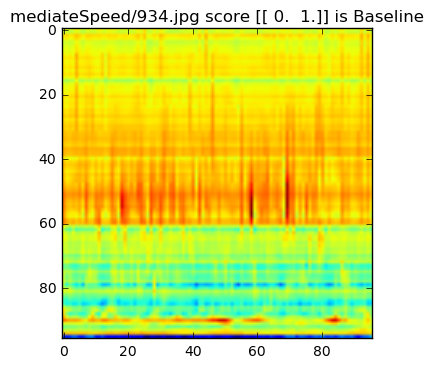

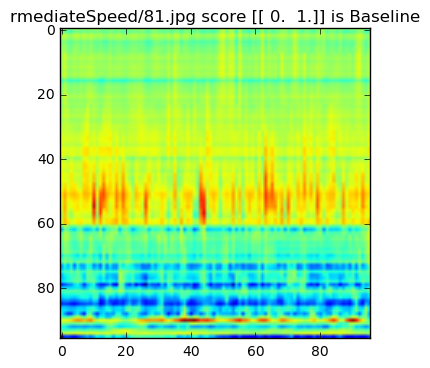

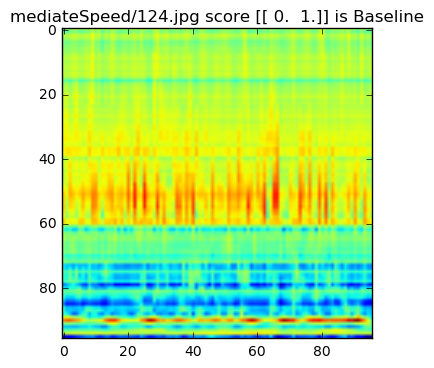

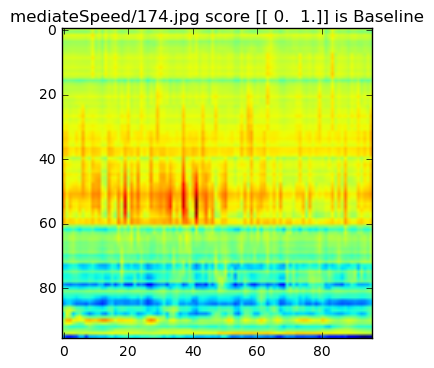

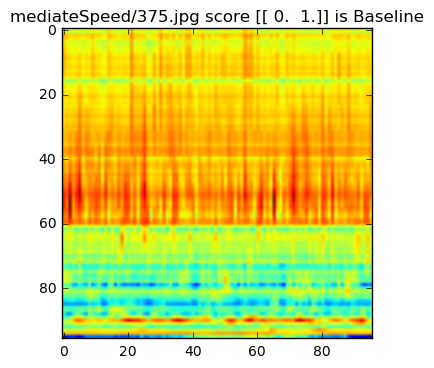

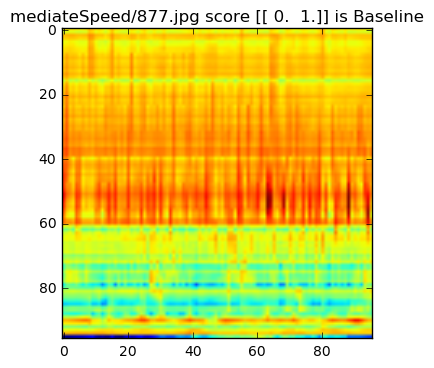

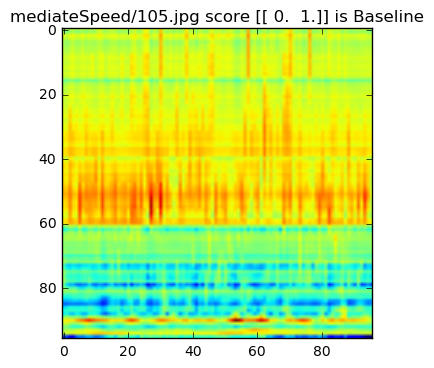

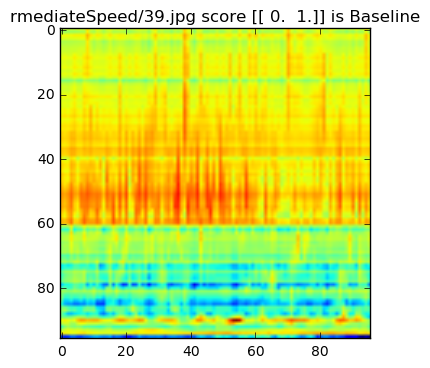

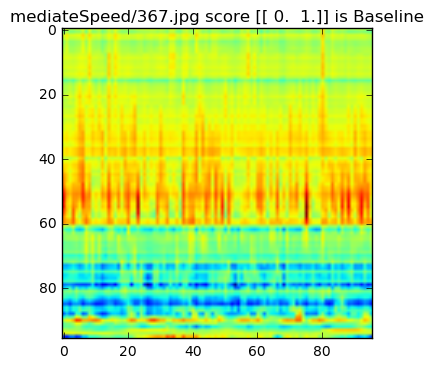

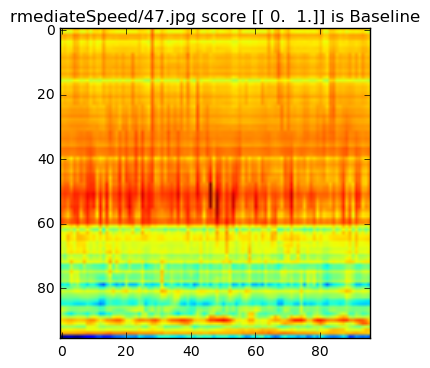

In [3]:
#Clasify examples in folder

import os
limitImages = 10
cn = {0 : "Inner", 1: "Baseline", 2 : "Outer"}

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('savedModels/BaselineOuterInner.meta')
    new_saver.restore(sess, 'savedModels/BaselineOuterInner')
    md = sess.graph.get_tensor_by_name('model_input:0')
    kp = sess.graph.get_tensor_by_name('dropout_prob:0')



    folderName = 'data/6 - Real World Examples'
    #Get file names
    files= [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(folderName)) for f in fn]
    for fname in files:
        if fname.split(".")[-1] == 'jpg':
            imageQuery = grayscaleEq(io.imread(fname)) #Open images
            imageQuery = dataset.normalizeImage(imageQuery) #Normalize images
            imageQuery = imageQuery.reshape((1, 96, 96, 1))
            
            outfc2 = sess.graph.get_tensor_by_name('fc2/Relu:0')
            
            ot = sess.run(tf.nn.softmax(outfc2), feed_dict={md: imageQuery,kp:1.0}) #PREDICT
            title = fname[-20:]+" score "+str(ot)+" is "+cn[np.argmax(ot)]
            if limitImages > 0:
                limitImages -=1
                plt.figure()
                plt.title(title)  #Show filename --- scores ---- predicted
                plt.imshow(imageQuery.reshape((96,96)))
            else:
                print title

In [8]:
#derp